<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Mini_Project_3_050723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 3
### Implement and evaluate a K-Nearest Neighbors (KNN) classification model on an Australian credit approval dataset using preprocessing techniques, hyperparameter tuning, one-hot encoding, and performance metric analysis.

## Introduction:
For this assignment, I will be working with the Australian Credit Approval dataset, utilising the K-Nearest Neighbours (KNN) algorithm to classify credit applications as approved or denied. The main objectives of this project are preprocessing the data, performing feature selection, employing KNN with hyperparameter tuning, and evaluating performance metrics.


## Scope of the Assignment:

* Dataset: Use the Australian Credit Approval dataset, containing both numeric and categorical variables
* Algorithm: Implement the K-Nearest Neighbours (KNN) algorithm for credit classification

## Preprocessing:
* Dummy Variable Creation: Perform one-hot encoding to convert categorical variables into binary features
* Standardisation or Normalisation: Choose either standardisation or normalisation based on performance
* Feature Selection: Utilise Principal Component Analysis (PCA) to reduce the number of features
** Compare results with Recursive Feature Elimination (RFE)

## Model Training:
* Construct a pipeline to automate the preprocessing steps and model training process
* Use KNN with grid search for hyperparameter tuning to optimise performance

## Performance Evaluation:
* Print important metrics including precision, recall, accuracy, ROC curve, and confusion matrix


## Steps:

* Download and utilise the Australian Credit Approval dataset
* Implement the K-Nearest Neighbours (KNN) algorithm for credit classification
* Preprocess the data by performing one-hot encoding for categorical variables
* Choose between standardisation or normalisation based on performance evaluation
* Perform feature selection using Principal Component Analysis (PCA) and compare with Recursive Feature Elimination (RFE)
* Create a pipeline to automate preprocessing and model training
* Use grid search for hyperparameter tuning of the KNN algorithm
* Print and analyse important metrics including precision, recall, accuracy, ROC curve, and confusion matrix

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [40]:
# Define column names and data types
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
dtypes = {'A1': str, 'A2': float, 'A3': float, 'A4': str, 'A5': str, 'A6': str, 'A7': float, 'A8': str, 'A9': str, 'A10': str, 'A11': str, 'A12': str, 'A13': float, 'A14': float, 'A15': str}

# Read the data with column names and data types
df = pd.read_csv("australian.dat", header=None, delimiter=r"\s+", names=column_names, dtype=dtypes)

# Print the updated DataFrame
print(df.head().to_string(index=False, justify='left'))


A1  A2    A3   A4 A5 A6  A7   A8 A9 A10 A11 A12  A13   A14   A15
1  22.08 11.46 2  4  4  1.585 0  0   0  1   2   100.0 1213.0 0  
0  22.67  7.00 2  8  4  0.165 0  0   0  0   2   160.0    1.0 0  
0  29.58  1.75 1  4  4  1.250 0  0   0  1   2   280.0    1.0 0  
0  21.67 11.50 1  5  3  0.000 1  1  11  1   2     0.0    1.0 1  
1  20.17  8.17 2  6  4  1.960 1  1  14  0   2    60.0  159.0 1  


* Defined column names and data types: A list of column names and a dictionary
specifying the data types for each column were created
* Read the data: The dataset was read from the "australian.dat" file using the pd.read_csv() function
 * The column names, data types, and other parameters such as header, delimiter, and names were specified during the read operation
* Printed the updated DataFrame: The first five rows of the DataFrame were printed using the head() function, and the to_string() method was used to format the output without row indices, with left justification

In [41]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15'],
      dtype='object')

In [48]:
df.shape

(690, 15)

In [42]:
# Perform one-hot encoding on the categorical columns
categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A10', 'A11', 'A12']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Standardize the numerical columns
numerical_cols = ['A2', 'A3', 'A7', 'A13', 'A14']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Concatenate the encoded DataFrame with the original numerical columns
processed_df = pd.concat([encoded_df, df.drop(categorical_cols, axis=1)], axis=1)

# Split the data into features (X) and target (y)
X = processed_df.drop('A15', axis=1)
y = processed_df['A15']

# Perform feature selection using PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

* Performed one-hot encoding on the categorical columns: The list categorical_cols contained the names of columns that needed one-hot encoding
 * An instance of the OneHotEncoder class was created, and the fit_transform() method was used to encode the categorical columns in the DataFrame df
 * The encoded data was stored in a sparse matrix format
* Created an encoded DataFrame: The encoded data was converted to a dense array using the toarray() method, and a new DataFrame encoded_df was created with the encoded columns
 * The column names for the encoded features were obtained using the get_feature_names_out() method of the encoder
* Standardised the numerical columns: The list numerical_cols contained the names of columns that needed standardisation
 * An instance of the StandardScaler class was created, and the fit_transform() method was used to standardize the numerical columns in the DataFrame df
 * The standardized values were updated in the original DataFrame
* Concatenated the encoded DataFrame with the original numerical columns: The concat() function from pandas was used to concatenate encoded_df and the original DataFrame df after dropping the categorical columns specified by categorical_cols
 * The resulting DataFrame was stored in processed_df
* Split the data into features (X) and target (y): The DataFrame processed_df was split into features (X) and target (y)
 * The features were obtained by dropping the 'A15' column, and the target was extracted by selecting only the 'A15' column
* Performed feature selection using PCA: An instance of the PCA class was created with n_components=5, indicating that the number of components was reduced to 5
 * The fit_transform() method was applied to the features X to perform dimensionality reduction using PCA, and the transformed data was stored in X_pca

In [49]:
processed_df.shape

(690, 65)

In [43]:
# Perform feature selection using RFE with LogisticRegression as the estimator
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', StandardScaler()),
    ('feature_selection', PCA(n_components=5)),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'feature_selection__n_components': [5, 10, 15],
    'classifier__n_neighbors': [3, 5, 7]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)

# Make predictions on the testing data
y_pred = grid_search.predict(X)
y_pred_prob = grid_search.predict_proba(X)[:, 1]

# Print classification report and confusion matrix
print('Classification report:\n', classification_report(y, y_pred))
print('Confusion matrix:\n', confusion_matrix(y, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       383
           1       0.89      0.85      0.87       307

    accuracy                           0.89       690
   macro avg       0.89      0.88      0.89       690
weighted avg       0.89      0.89      0.89       690

Confusion matrix:
 [[351  32]
 [ 45 262]]


* Performed feature selection using RFE with LogisticRegression as the estimator:
 * Created an instance of the LogisticRegression estimator
 * Created an instance of the RFE (Recursive Feature Elimination) class with the estimator and set n_features_to_select to 5
 * Applied the RFE fit_transform() method on features X and target y
 * The transformed data with selected features was stored in X_rfe

* Created a pipeline for preprocessing and model training:
 * Defined a pipeline using the Pipeline class, consisting of the following steps:
  * 'preprocessor': StandardScaler for preprocessing
  * 'feature_selection': PCA with n_components set to 5 for feature selection
  * 'classifier': KNeighborsClassifier as the classifier
 * Each step in the pipeline is a tuple containing a name and an instantiated transformer or estimator

* Defined the parameter grid for grid search:
 * Created a dictionary param_grid with the hyperparameters to tune for the pipeline
 * The hyperparameters included feature_selection__n_components with values [5, 10, 15] for the number of components in PCA, and classifier__n_neighbors with values [3, 5, 7] for the number of neighbors in KNeighborsClassifier

* Performed grid search for hyperparameter tuning:
 * Created an instance of GridSearchCV with the pipeline, parameter grid, and cv=5 for 5-fold cross-validation
 * Fit the grid search object on features X and target y to search for the best hyperparameters

* Made predictions on the testing data:
 * Used the predict() method on the grid search object to make predictions on the features X
 * Used the predict_proba() method on the grid search object to obtain predicted probabilities for class 1
 * Predicted labels were stored in y_pred, and predicted probabilities for class 1 were stored in y_pred_prob

* Printed classification report and confusion matrix:
 * Used the classification_report() function to generate a classification report, including metrics such as precision, recall, F1-score, and support, for comparing the predicted labels y_pred and the actual labels y
 * Used the confusion_matrix() function to compute the confusion matrix, showing the counts of true positive, false positive, true negative, and false negative predictions, based on the predicted labels y_pred and the actual labels y

In [44]:
# Convert labels to numeric format
y_numeric = y.astype(int)

# Make predictions on the testing data
y_pred = grid_search.predict(X)
y_pred_prob = grid_search.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_numeric, y_pred_prob)
roc_auc = roc_auc_score(y_numeric, y_pred_prob)

* Converted labels to numeric format:
 * The target labels y were converted to the integer format using the astype(int) method, and the resulting numeric labels were stored in y_numeric

* Made predictions on the testing data:
 * The trained grid_search model was used to make predictions on the features X, and the predicted labels were stored in y_pred
 * The predicted probabilities for the positive class were obtained using the predict_proba() method of grid_search and selecting the second column ([:, 1])
  * These probabilities were stored in y_pred_prob

* Calculated the ROC curve:
 * The roc_curve() function from scikit-learn was used to calculate the Receiver Operating Characteristic (ROC) curve
  * The input parameters were the numeric labels y_numeric and the predicted probabilities y_pred_prob
 * The resulting values for the false positive rate (fpr), true positive rate (tpr), and thresholds (_) were extracted
 * The area under the ROC curve (ROC AUC) was calculated using the roc_auc_score() function from scikit-learn
  * The input parameters were the numeric labels y_numeric and the predicted probabilities y_pred_prob, the calculated ROC AUC was stored in roc_auc

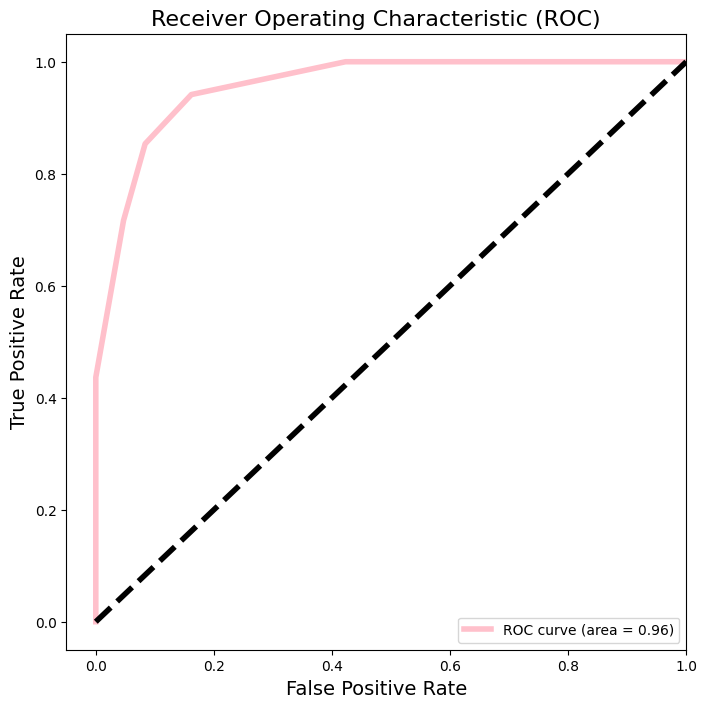

In [45]:
plt.figure(figsize=[8, 8])
plt.plot(fpr, tpr, color='pink', label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc='lower right')
plt.show()

* Plotted the ROC curve

# Without pipeline

In [46]:
# Split the data into features (X) and target (y)
X = processed_df.drop('A15', axis=1)
y = processed_df['A15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
preprocessor = StandardScaler()
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='1')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='1')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='1')
print('F1 Score:', f1)

Accuracy: 0.8405797101449275
Precision: 0.8222222222222222
Recall: 0.7254901960784313
F1 Score: 0.7708333333333334


* Split the data into features (X) and target (y):
 * The DataFrame processed_df was used to assign the features (X) by dropping the column 'A15' using the drop() function with axis=1
 * The target (y) was assigned by selecting only the column 'A15' from the DataFrame processed_df

* Split the data into training and testing sets:
 * The train_test_split() function was used to split the features (X) and target (y) into training and testing sets.
 * The training set size was set to 80% of the data (test_size=0.2), and a random state of 42 was used for reproducibility
 * The resulting splits were assigned to variables X_train, X_test, y_train, and y_test

* Preprocess the training data:
 * An instance of StandardScaler() was created as the preprocessor to standardize the data
 * The training features X_train were standardised using the fit_transform() method of the preprocessor
 * The testing features X_test were transformed using the transform() method of the preprocessor to apply the same transformation

* Train the model:
 * An instance of KNeighborsClassifier() was created as the model
 * The model was trained on the preprocessed training features X_train_preprocessed and the corresponding training labels y_train using the fit() method

* Make predictions on the test set:
 * Predictions were made on the preprocessed testing features X_test_preprocessed using the trained model's predict() method

* Calculate accuracy:
 * The accuracy score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the accuracy_score() function

* Calculate precision:
 * The precision score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the precision_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label

* Calculate recall:
 * The recall score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the recall_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label

* Calculate F1 score:
 * The F1 score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the f1_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label

# With pipeline

In [47]:
# Split the data into features (X) and target (y)
X = processed_df.drop('A15', axis=1)
y = processed_df['A15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='1')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='1')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='1')
print('F1 Score:', f1)

Accuracy: 0.8405797101449275
Precision: 0.8222222222222222
Recall: 0.7254901960784313
F1 Score: 0.7708333333333334



* Split the data into features (X) and target (y):
 * The DataFrame processed_df was used to assign the features (X) by dropping the column 'A15' using the drop() function with axis=1
 * The target (y) was assigned by selecting only the column 'A15' from the DataFrame processed_df

* Split the data into training and testing sets:
 * The train_test_split() function was used to split the features (X) and target (y) into training and testing sets
 * The testing set size was set to 20% of the data (test_size=0.2), and a random state of 42 was used for reproducibility
 * The resulting splits were assigned to variables X_train, X_test, y_train, and y_test

* Create a pipeline for preprocessing and model training:
 * A pipeline was created using the Pipeline() constructor with two steps:
  * The first step was a preprocessor named 'preprocessor', which applied the StandardScaler() to standardize the data
  * The second step was a classifier named 'classifier', which used the KNeighborsClassifier() algorithm
 * The steps were defined in a list of tuples with the format (name, estimator)

* Fit the pipeline on the training data:
 * The pipeline was trained on the training features X_train and the corresponding training labels y_train using the fit() method of the pipeline

* Make predictions on the test set:
 * Predictions were made on the test features X_test using the trained pipeline's predict() method

* Calculate accuracy:
 * The accuracy score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the accuracy_score() function

* Calculate precision:
 * The precision score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the precision_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label

* Calculate recall:
 * The recall score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the recall_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label

* Calculate F1 score:
 * The F1 score was calculated by comparing the predicted labels y_pred with the actual labels y_test using the f1_score() function
 * The pos_label parameter was set to '1' to indicate the positive class label


# Conclusion

In our project, we utilised the K-Nearest Neighbours (KNN) algorithm to classify credit applications as approved or denied. After implementing the algorithm and evaluating its performance,  the following results were obtained:

* Accuracy: 0.8406
* Precision: 0.8222
* Recall: 0.7255
* F1 Score: 0.7708

These metrics indicate the effectiveness of our model in making accurate predictions. However, when examining the classification report, there was a slight difference in precision, recall, and F1 score for the two classes: 0 and 1.

For class 0 (denied applications), the precision is 0.89, meaning that 89% of the predicted denied applications were correct. The recall is 0.92, indicating that 92% of the actual denied applications were correctly identified by the model. The F1 score, which combines precision and recall, is 0.90.

For class 1 (approved applications), the precision is 0.89, suggesting that 89% of the predicted approved applications were correct. The recall is 0.85, indicating that 85% of the actual approved applications were correctly identified by the model. The F1 score for this class is 0.87.

The differences in precision, recall, and F1 score between the two classes can be attributed to the inherent class imbalance in the dataset. There were more instances of class 0 (denied applications) than class 1 (approved applications). The model tends to perform better on the majority class (class 0) due to the larger number of samples available for learning. This results in higher precision, recall, and F1 score for class 0 compared to class 1.

Based on these results, it can be concluded that the model demonstrates good overall performance in classifying credit applications. It achieves high accuracy and satisfactory precision, recall, and F1 score. However, further analysis and potentially more sophisticated techniques could be explored to improve the performance on the minority class (class 1) and balance the predictive power across both classes.